In [1]:
#Importamos os pacotes
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.tri as tri
import plotly.express as px
from scipy.stats.stats import pearsonr

%matplotlib inline
sns.set_style('darkgrid')

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df["sqrtGlucose"] = np.sqrt(df["Glucose"])
df["sqrtBloodPressure"] = np.sqrt(df["BloodPressure"])
df["sqrtBMI"] = np.sqrt(df["BMI"])
df["squareBMI"] = df["BMI"]**2
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  sqrtGlucose  sqrtBloodPressure  \
0                     0.627   50        1    12.165525           8.485281   
1                     0.351   31        0     9.219544           8.124038   
2                     0.672   32        1    13.527749           8.000000   
3                     0.167   21        0     9.433981           8.124038   
4                     2.288   33        1    11.704700           6.324555   

    sqrtBMI  squareBMI  
0  5.796551    1128.96  
1  5.157519     707.56  
2  4.827007     542.89  
3  5.300943     789.61  
4  6.565059    1857.61

In [3]:
#Reparametrizar a resposta de 1 a 'Diab' e 0 a 'Non-Diab'
df.Outcome = df.Outcome.replace({0:'Non-Diab',1:'Diab'})
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age   Outcome  sqrtGlucose  sqrtBloodPressure  \
0                     0.627   50      Diab    12.165525           8.485281   
1                     0.351   31  Non-Diab     9.219544           8.124038   
2                     0.672   32      Diab    13.527749           8.000000   
3                     0.167   21  Non-Diab     9.433981           8.124038   
4                     2.288   33      Diab    11.704700           6.324555   

    sqrtBMI  squareBMI  
0  5.796551    1128.96  
1  5.157519     707.56  
2  4.827007     542.89  
3  5.300943     789.61  
4  6.565059    1857.61

In [5]:
#Validação de alteração de dados
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
sqrtGlucose                 float64
sqrtBloodPressure           float64
sqrtBMI                     float64
squareBMI                   float64
dtype: object

In [6]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
 9   sqrtGlucose               768 non-null    float64
 10  sqrtBloodPressure         768 non-null    float64
 11  sqrtBMI                   768 non-null    float64
 12  squareBMI                 768 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 78.1+ KB


In [7]:
#Estatísticas básicas
df.describe().T

count         mean         std     min         25%  \
Pregnancies               768.0     3.845052    3.369578   0.000    1.000000   
Glucose                   768.0   120.894531   31.972618   0.000   99.000000   
BloodPressure             768.0    69.105469   19.355807   0.000   62.000000   
SkinThickness             768.0    20.536458   15.952218   0.000    0.000000   
Insulin                   768.0    79.799479  115.244002   0.000    0.000000   
BMI                       768.0    31.992578    7.884160   0.000   27.300000   
DiabetesPedigreeFunction  768.0     0.471876    0.331329   0.078    0.243750   
Age                       768.0    33.240885   11.760232  21.000   24.000000   
sqrtGlucose               768.0    10.874708    1.624406   0.000    9.949874   
sqrtBloodPressure         768.0     8.090865    1.910008   0.000    7.874008   
sqrtBMI                   768.0     5.584220    0.900066   0.000    5.224940   
squareBMI                 768.0  1085.604102  497.953552   0.000  745.290000   

                                  50%          75%          max  
Pregnancies                  3.000000     6.000000    17.000000  
Glucose                    117.000000   140.250000   199.000000  
BloodPressure               72.000000    80.000000   122.000000  
SkinThickness               23.000000    32.000000    99.000000  
Insulin                     30.500000   127.250000   846.000000  
BMI                         32.000000    36.600000    67.100000  
DiabetesPedigreeFunction     0.372500     0.626250     2.420000  
Age                         29.000000    41.000000    81.000000  
sqrtGlucose                 10.816654    11.842705    14.106736  
sqrtBloodPressure            8.485281     8.944272    11.045361  
sqrtBMI                      5.656854     6.049793     8.191459  
squareBMI                 1024.000000  1339.560000  4502.410000

<Figure size 720x480 with 0 Axes>

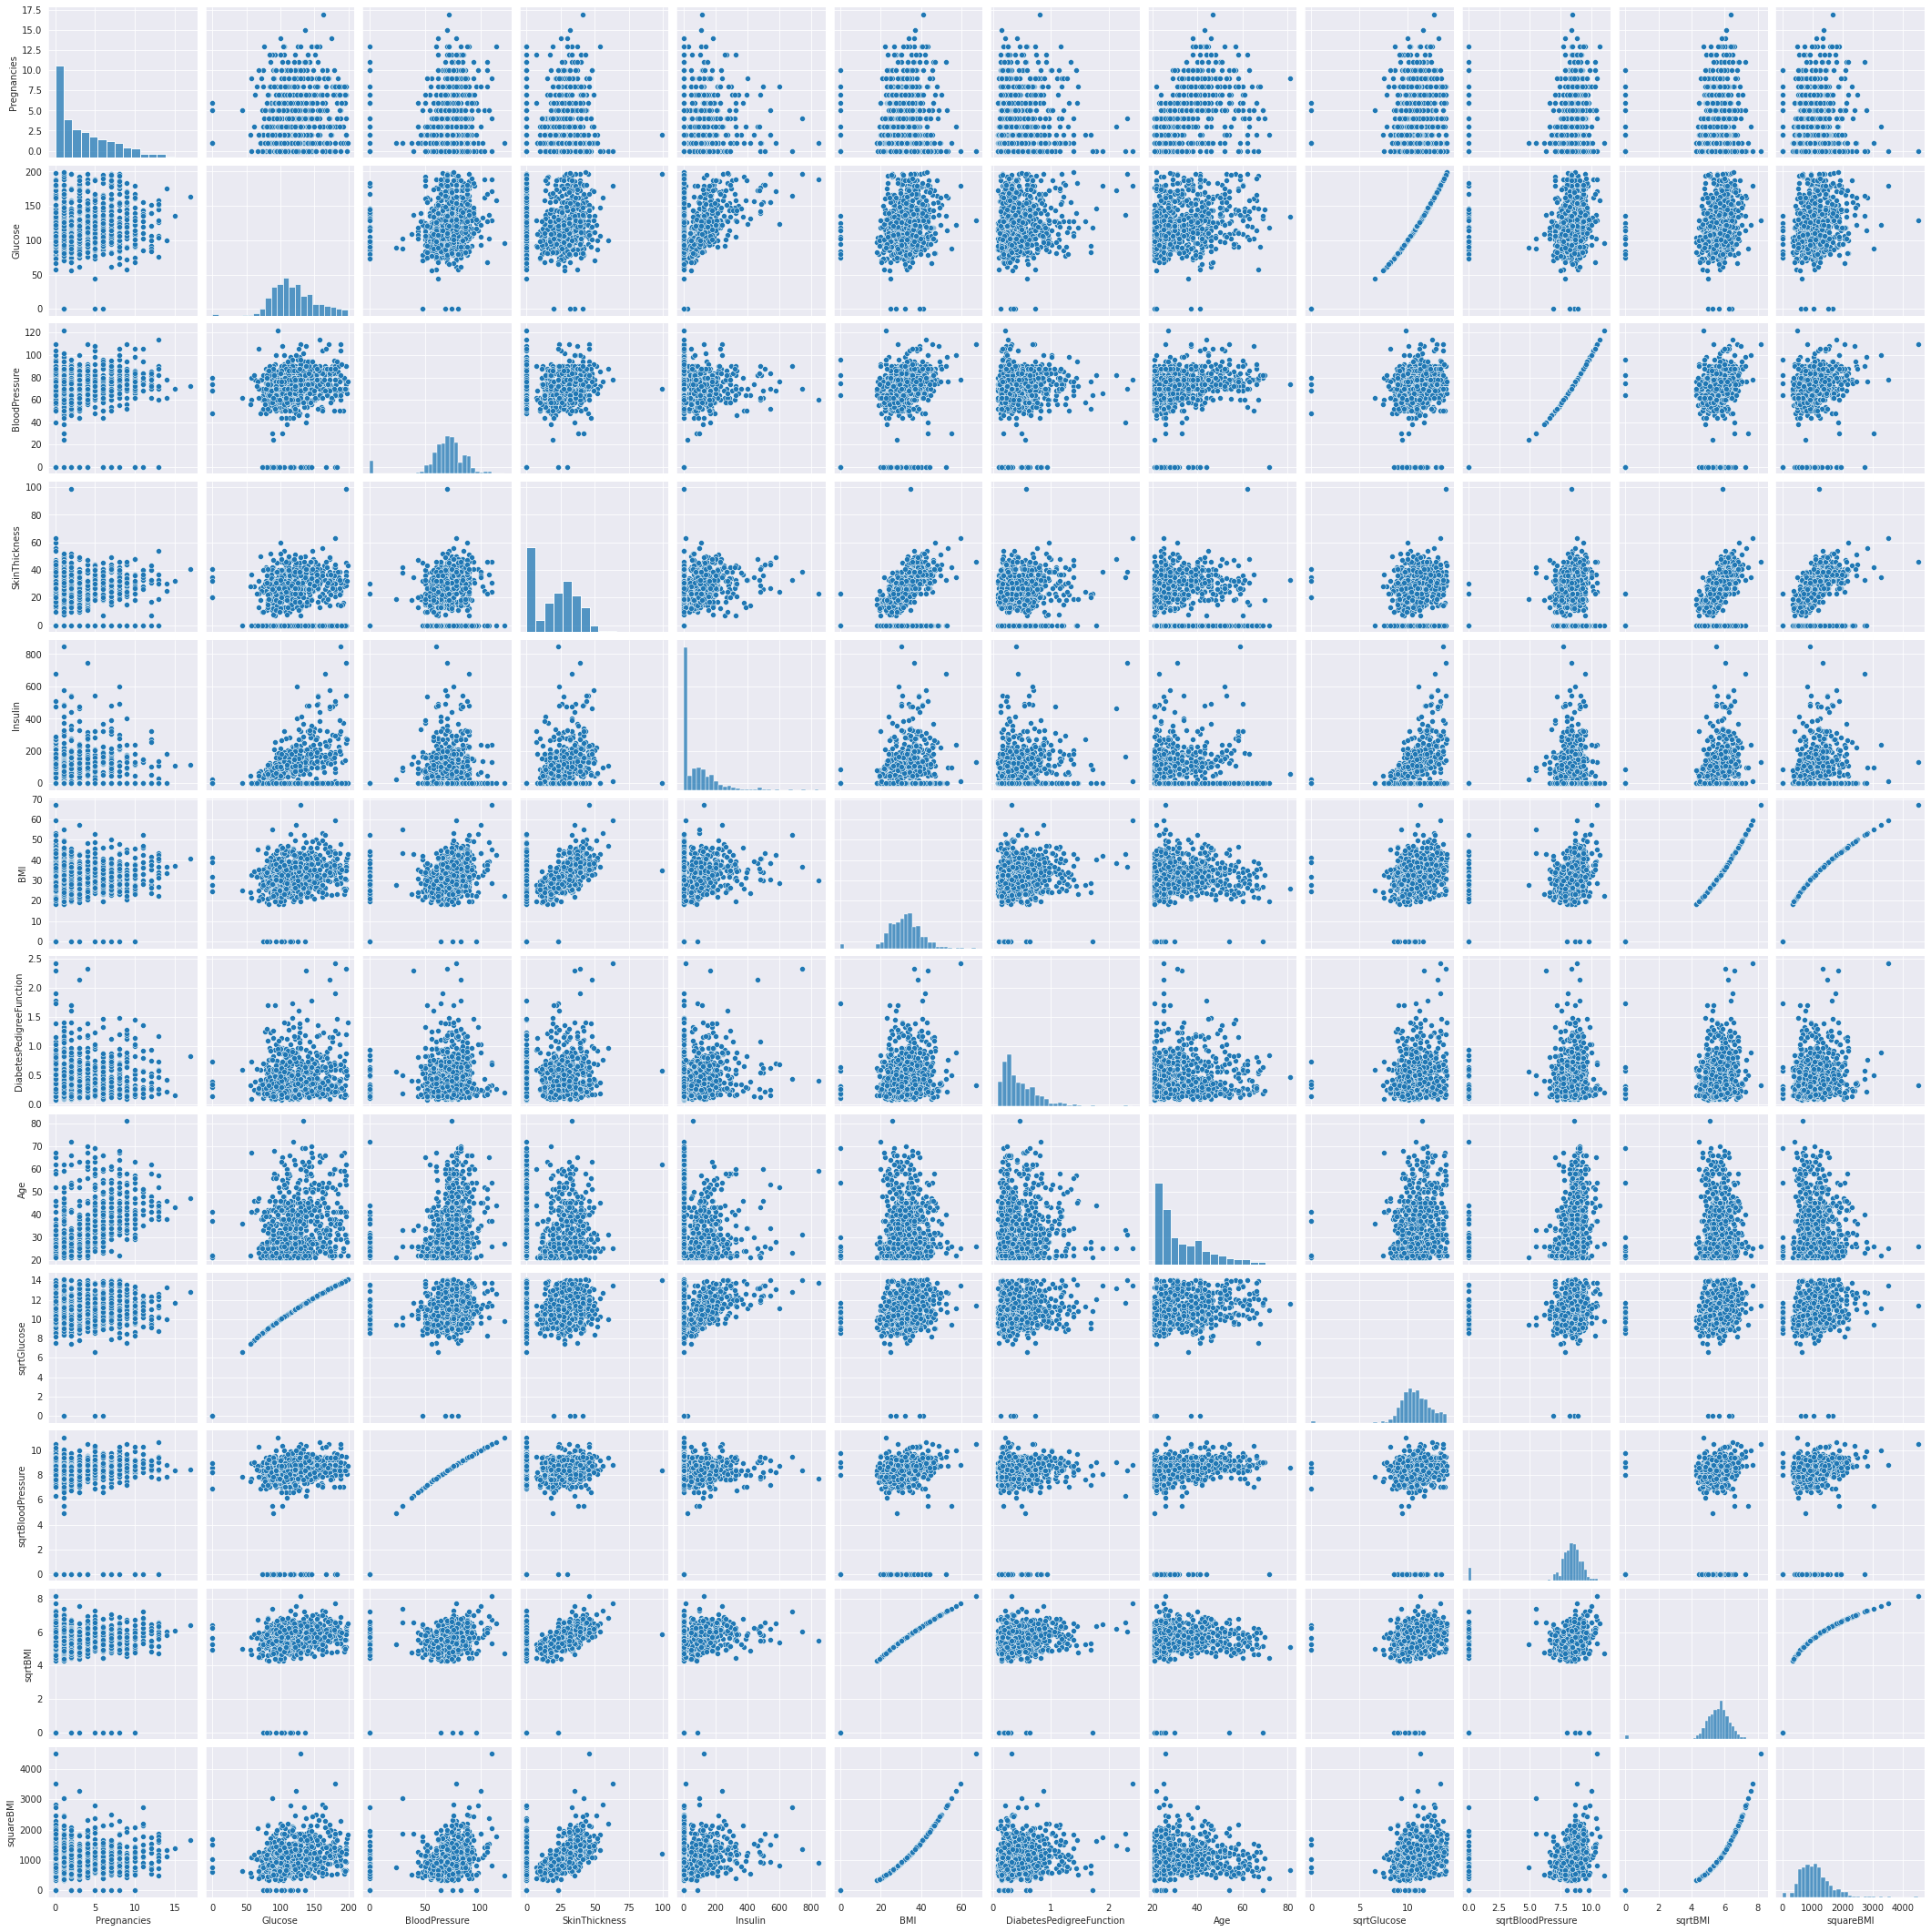

In [8]:
#Criar um Pairplot do dataset
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

<Figure size 720x480 with 0 Axes>

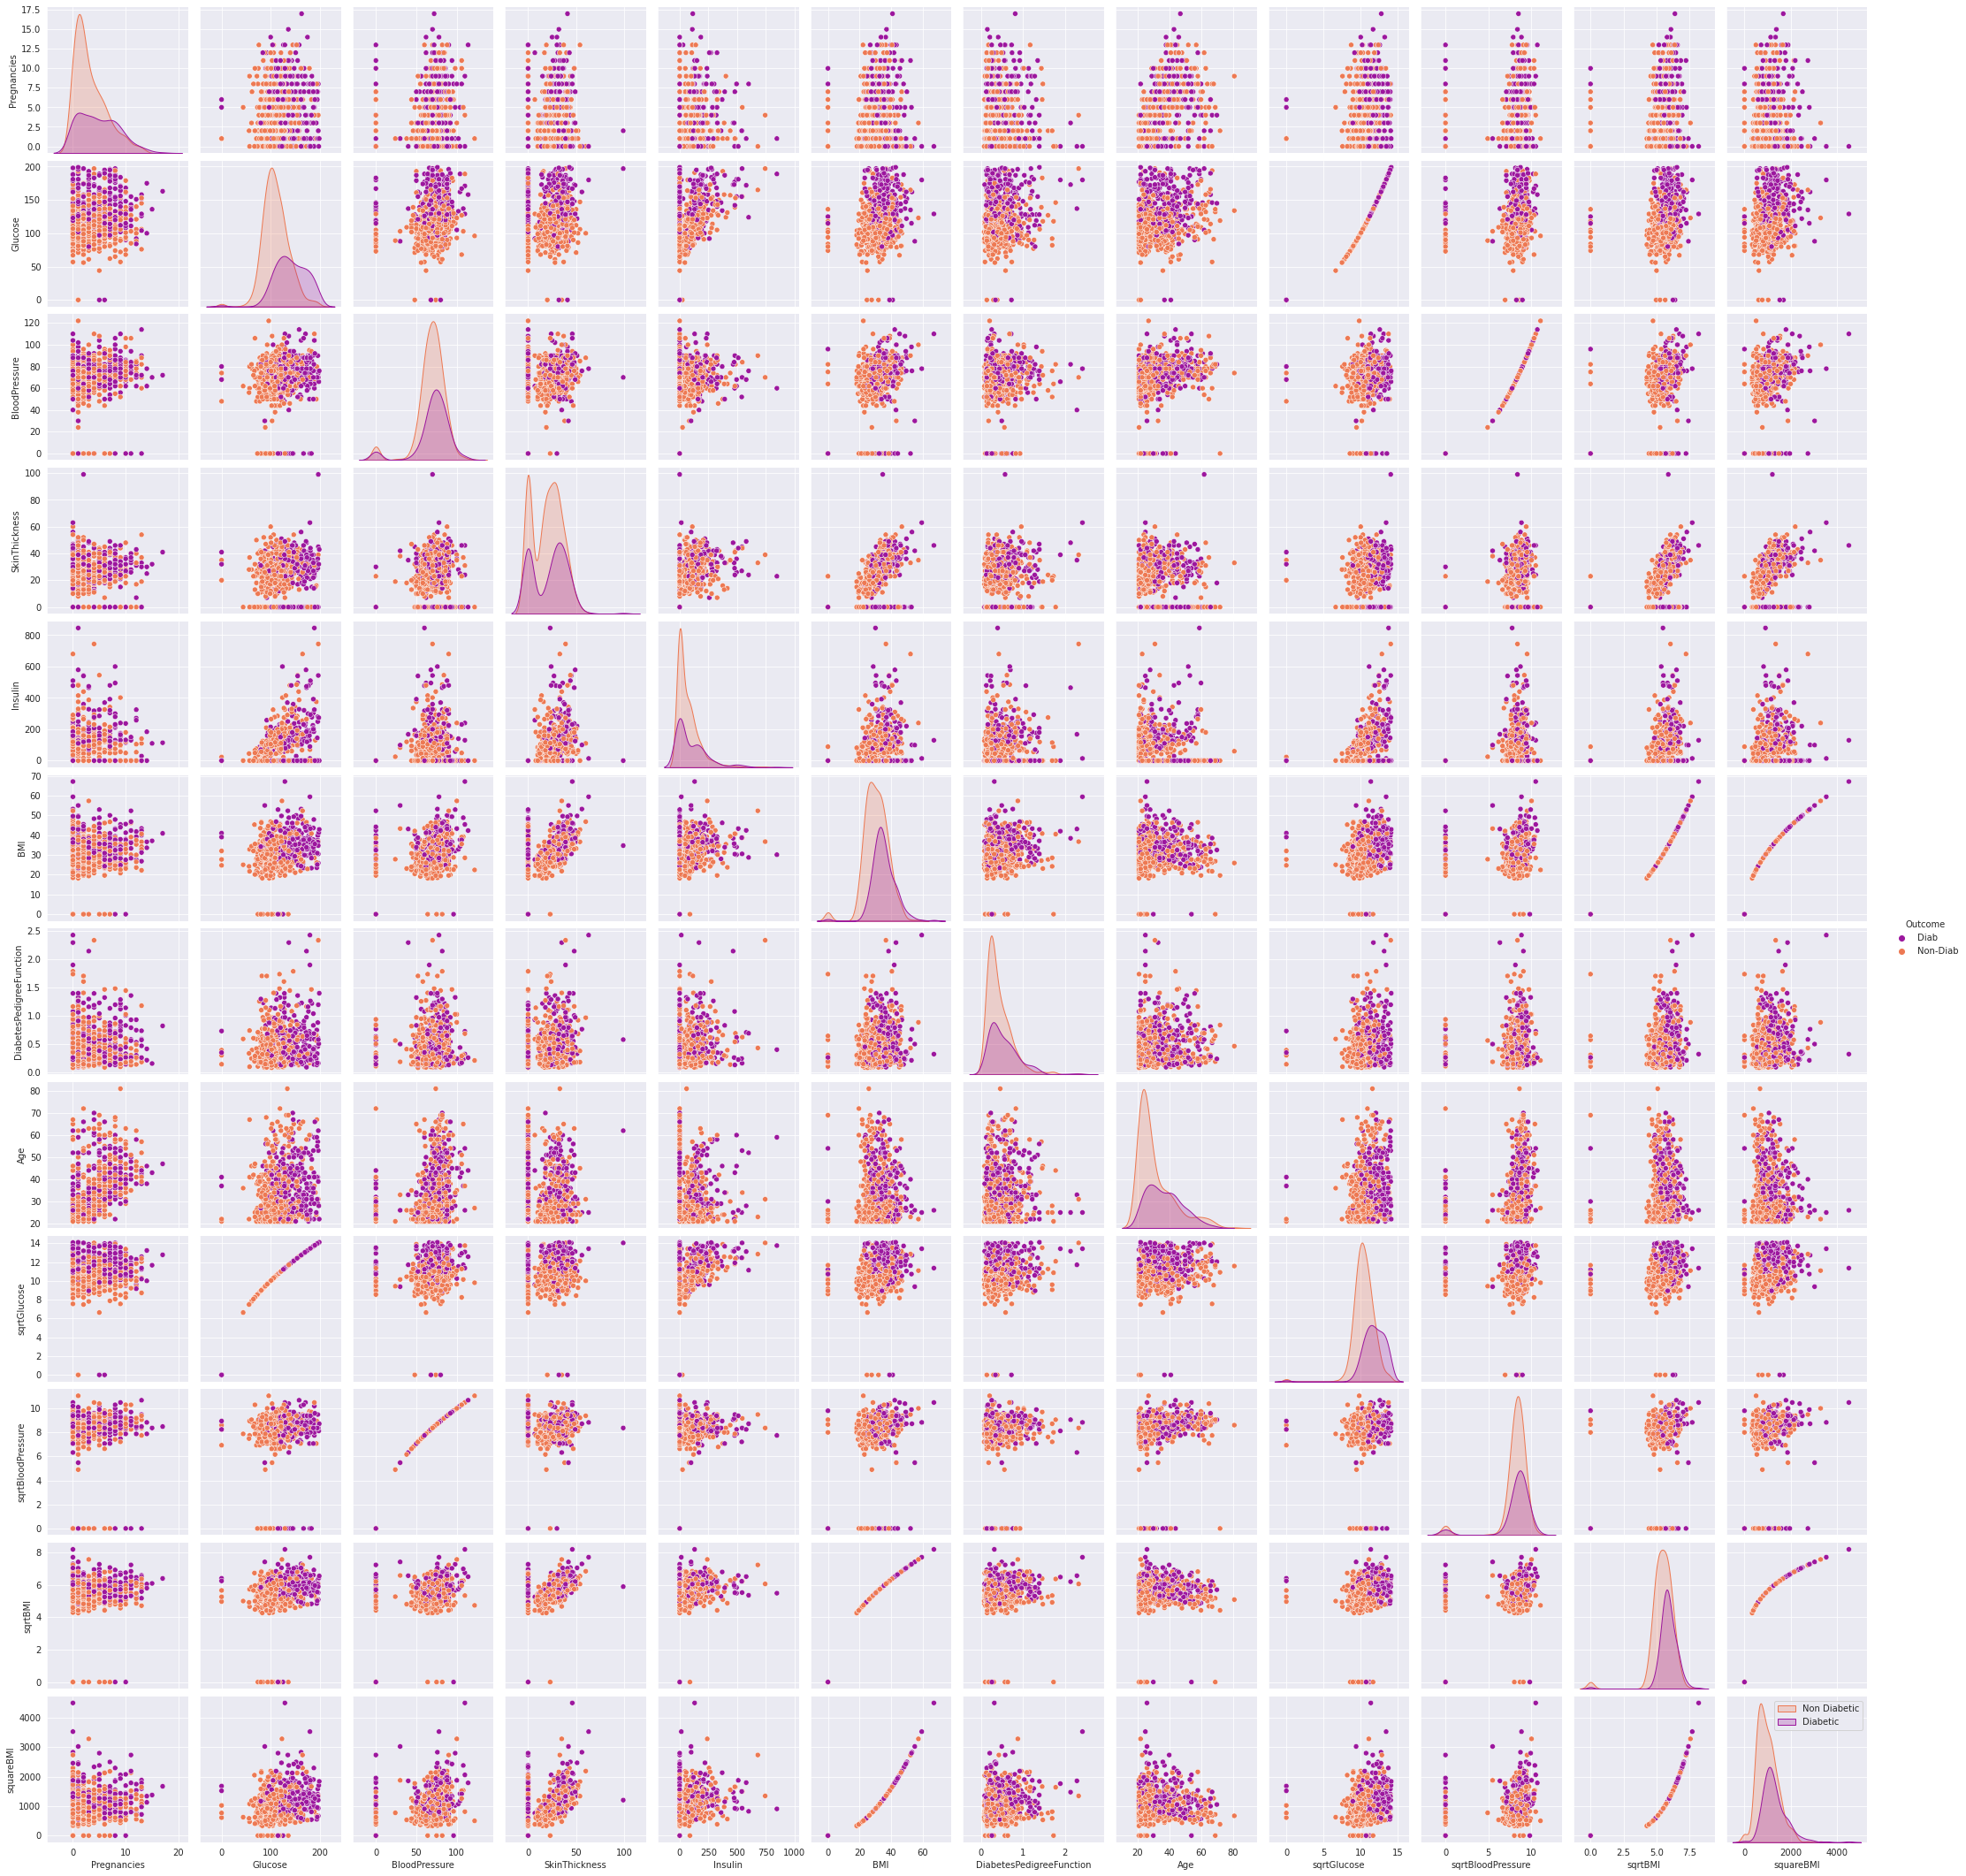

In [9]:
#Criar um Pairplot do dataset segundo a resposta
plt.figure(dpi = 120)
sns.pairplot(df, hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

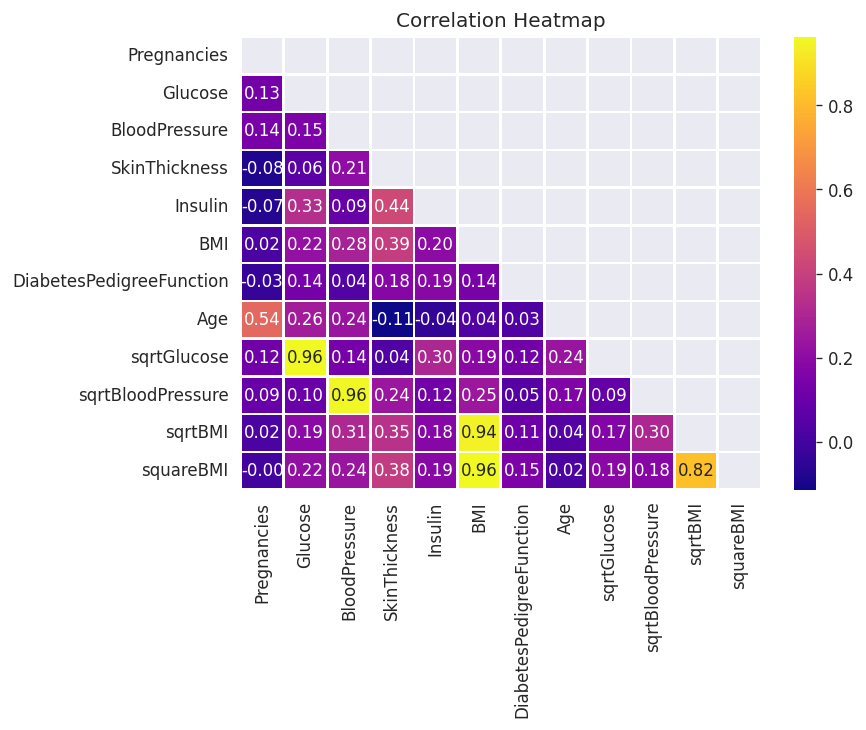

In [10]:
#Correlações
plt.figure(dpi = 120,figsize= (7,5))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

## P-value

In [11]:
pearsonr(df["sqrtBloodPressure"],df["BloodPressure"])

(0.9579050637509021, 0.0)

In [12]:
pearsonr(df["Age"],df["BMI"])

(0.03624187009229414, 0.3158329898723243)

In [13]:
pearsonr(df["Age"], df["Pregnancies"])                   

(0.544341228402339, 1.8628128328627385e-60)

#Join plot entre Glucosa e os resto das features

Joint plot de Glucosa con otras variables ==> 

Corr entre Glucose y Pregnancies ==>  0.12945867149927248


<Figure size 500x400 with 0 Axes>

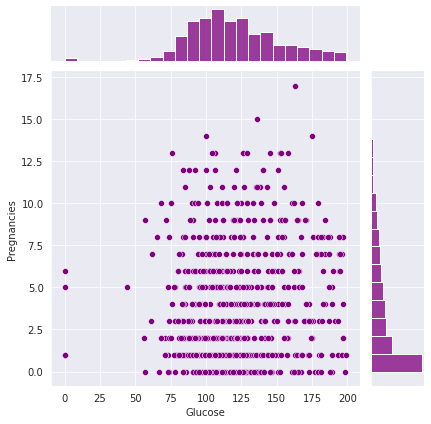

Corr entre Glucose y BloodPressure ==>  0.1525895865686646


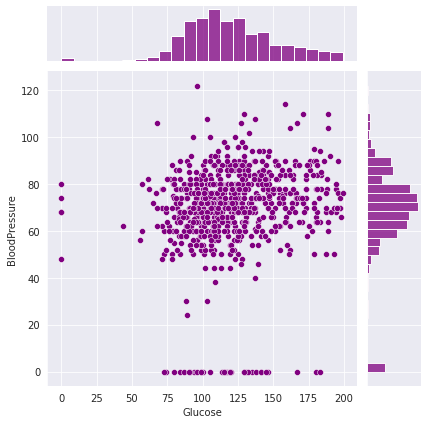

Corr entre Glucose y SkinThickness ==>  0.05732789073817692


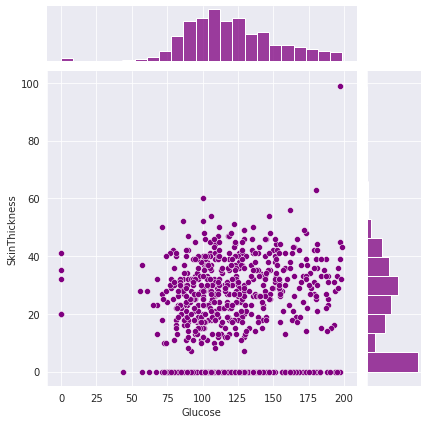

Corr entre Glucose y Insulin ==>  0.3313571099202092


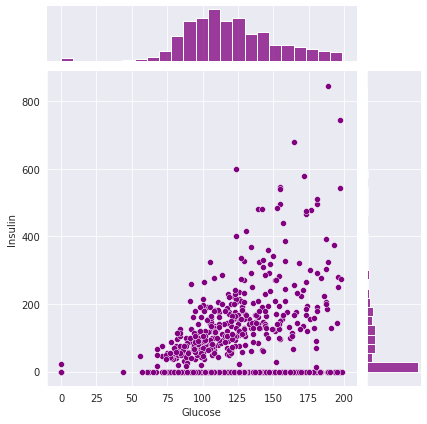

Corr entre Glucose y BMI ==>  0.2210710694589828


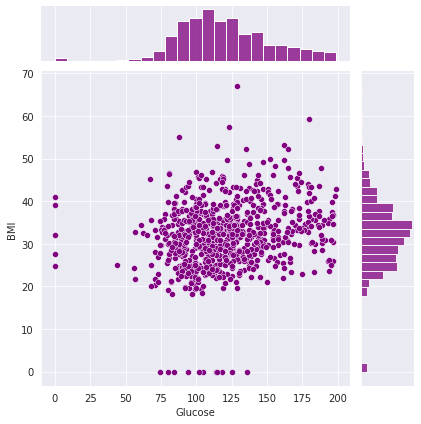

Corr entre Glucose y DiabetesPedigreeFunction ==>  0.13733729982837092


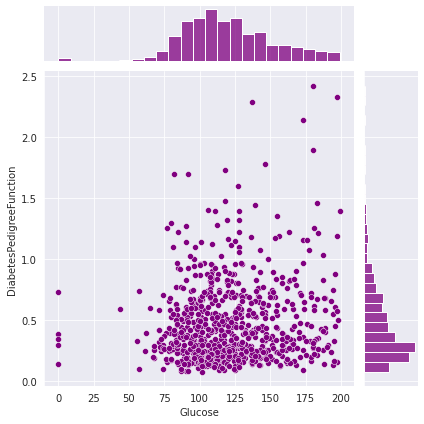

Corr entre Glucose y Age ==>  0.26351431982433343


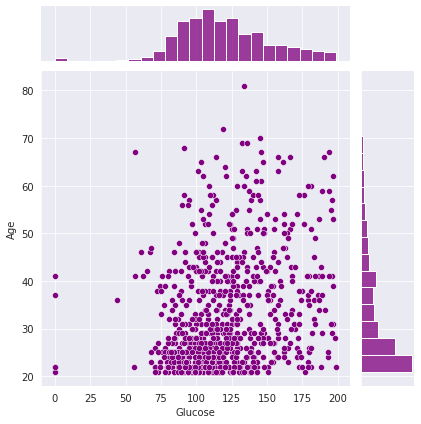

Corr entre Glucose y sqrtGlucose ==>  0.9635663492744838


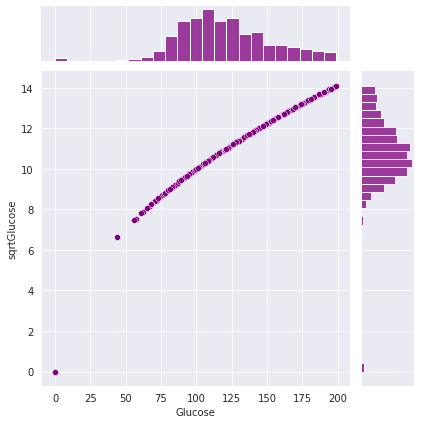

Corr entre Glucose y sqrtBloodPressure ==>  0.10135543707049897


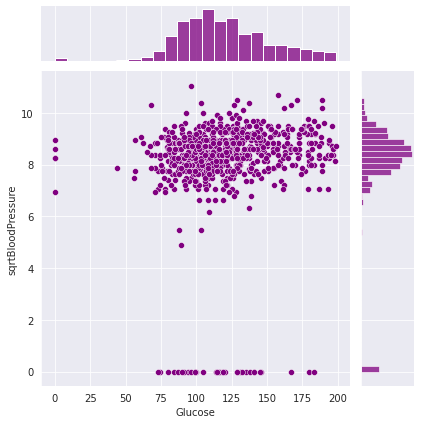

Corr entre Glucose y sqrtBMI ==>  0.19425420996860185


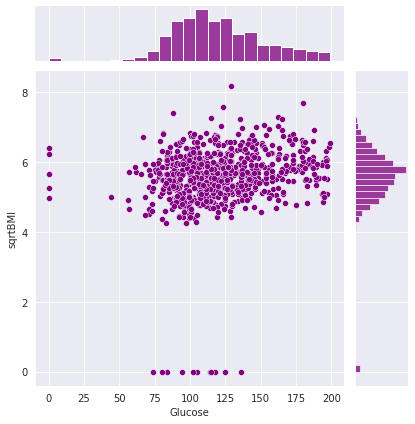

Corr entre Glucose y squareBMI ==>  0.2163947927406797


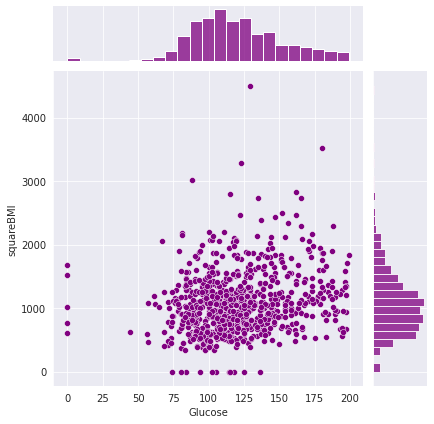

In [14]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Glucosa con otras variables ==> \n")
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Corr entre Glucose y {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'scatter',color = 'purple')
        plt.show()

Joint plot de Glucosa con otras variables ==> 

Corr entre Glucose y Pregnancies ==>  0.12945867149927248


<Figure size 500x400 with 0 Axes>

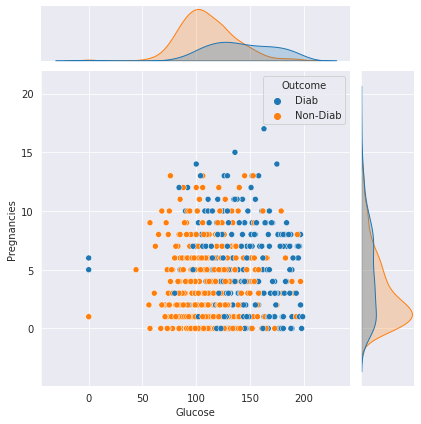

Corr entre Glucose y BloodPressure ==>  0.1525895865686646


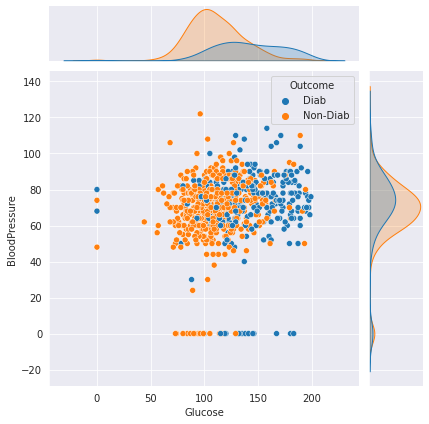

Corr entre Glucose y SkinThickness ==>  0.05732789073817692


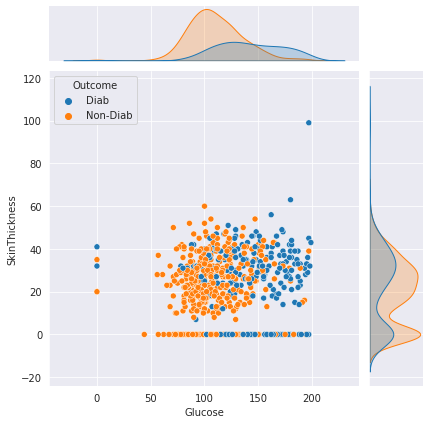

Corr entre Glucose y Insulin ==>  0.3313571099202092


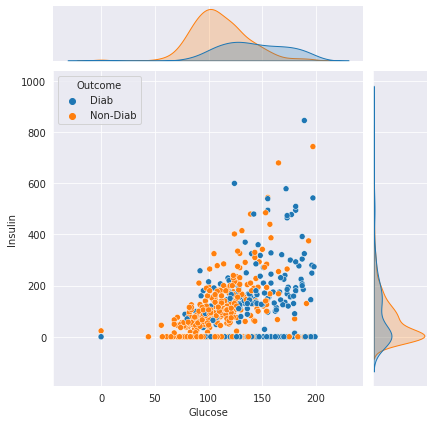

Corr entre Glucose y BMI ==>  0.2210710694589828


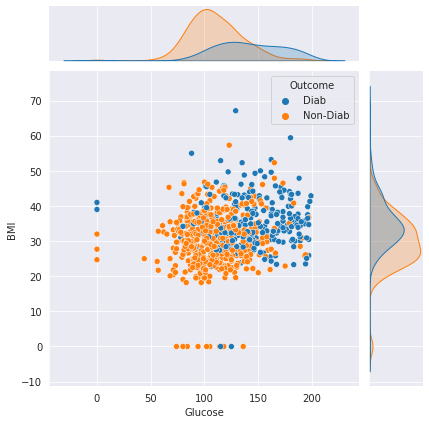

Corr entre Glucose y DiabetesPedigreeFunction ==>  0.13733729982837092


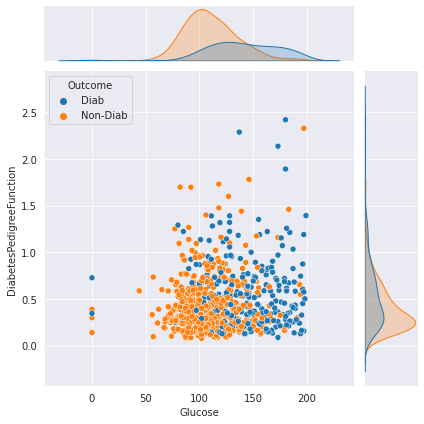

Corr entre Glucose y Age ==>  0.26351431982433343


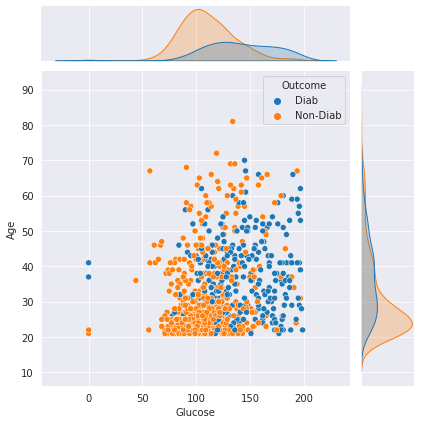

Corr entre Glucose y sqrtGlucose ==>  0.9635663492744838


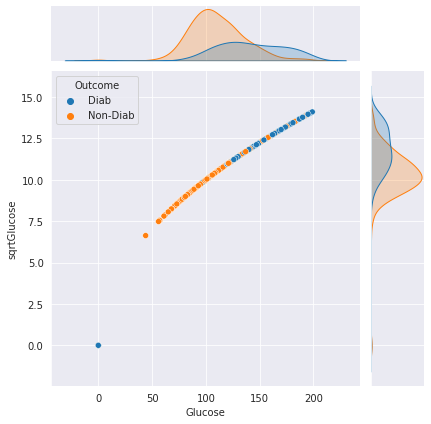

Corr entre Glucose y sqrtBloodPressure ==>  0.10135543707049897


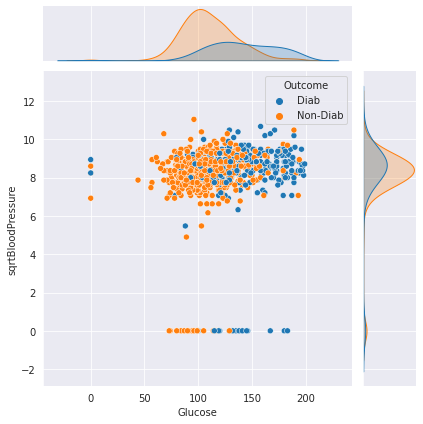

Corr entre Glucose y sqrtBMI ==>  0.19425420996860185


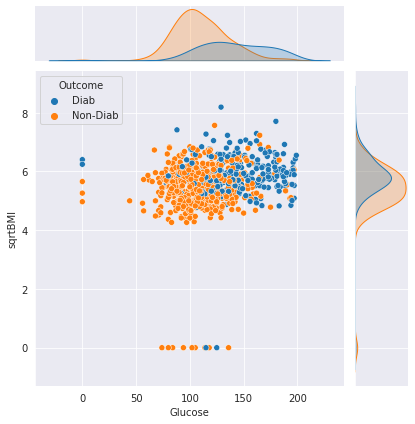

Corr entre Glucose y squareBMI ==>  0.2163947927406797


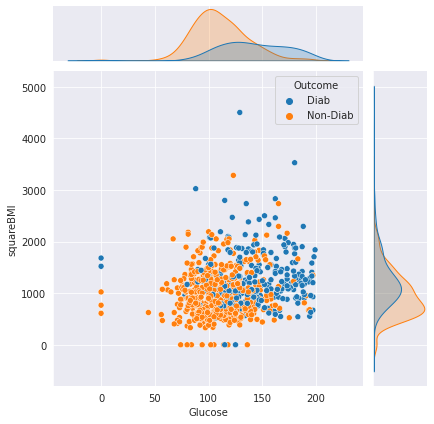

In [15]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Glucosa con otras variables ==> \n")
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Corr entre Glucose y {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'scatter',hue = 'Outcome')
        plt.show()

**Insight**: A glicose mostra uma associação linear positiva fraca com as outras variáveis ​​no conjunto de dados. Isso significa que ao aumentar o nível de glicose nos pacientes, as outras variáveis ​​também aumentarão.

# PCA

In [20]:
df = pd.read_csv("/content/diabetes.csv")
df["sqrtGlucose"] = np.sqrt(df["Glucose"])
df["sqrtBloodPressure"] = np.sqrt(df["BloodPressure"])
df["sqrtBMI"] = np.sqrt(df["BMI"])
df["squareBMI"] = df["BMI"]**2

In [21]:
df.shape

(768, 13)

In [17]:
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI",
            "DiabetesPedigreeFunction","Age","sqrtGlucose","sqrtBloodPressure",
            "sqrtBMI","squareBMI"]

x = df.loc[:, features].values
y = df.loc[:,["Outcome"]].values
x = StandardScaler().fit_transform(x)

In [18]:
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ["PC1", "PC2","PC3","PC4"])
principalDf

PC1       PC2       PC3       PC4
0   -1.080611 -1.313252 -0.098129  0.512062
1    1.536548  1.081594 -0.773025 -0.532655
2    0.855098 -2.992162  0.876507  0.005001
3    1.331212  1.356681 -0.362052 -0.788717
4   -2.360759  1.393706  3.221844 -0.226462
..        ...       ...       ...       ...
763 -0.924514 -0.945042 -1.506281  0.649121
764 -0.640008  0.870251  0.016388  0.275479
765  0.763072 -0.539596 -0.293268 -0.696841
766  0.872292 -0.748826  0.048294  0.769985
767  0.792579  1.454713 -0.576222 -0.526880

[768 rows x 4 columns]

In [25]:
pca.explained_variance_ratio_

array([0.31387004, 0.17202751, 0.14816086, 0.11562992])

In [26]:
finalDf = pd.concat([principalDf, df[['Outcome']]], axis = 1)

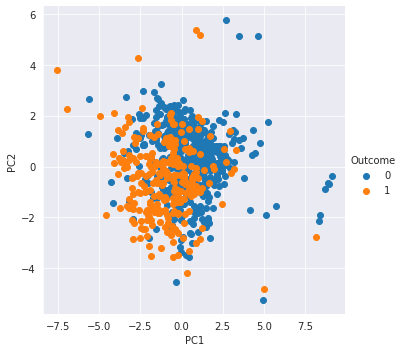

In [27]:
#FacetGrid  - sepal_width vs petal_width
sns.FacetGrid(finalDf,hue = 'Outcome' , size = 5).map(plt.scatter,'PC1','PC2').add_legend();
plt.show()

In [28]:
features = ["PC1","PC2","PC3","PC4"]
x = finalDf.loc[:, features].values
y = finalDf.loc[:,["Outcome"]].values
x = MinMaxScaler().fit_transform(x)

dfpadpca = pd.DataFrame(data = x, columns = ["PC1", "PC2","PC3","PC4"])

dfpadpca = pd.concat([dfpadpca, df[['Outcome']]], axis = 1)
dfpadpca["Outcome2"] = dfpadpca["Outcome"].replace({0:'Non-Diab',1:'Diab'})
dfpadpca.head(3)

PC1       PC2       PC3       PC4  Outcome  Outcome2
0  0.389155  0.357415  0.452010  0.483839        1      Diab
1  0.546089  0.575450  0.382453  0.390100        0  Non-Diab
2  0.505227  0.204561  0.552458  0.438342        1      Diab

In [29]:
fig = px.scatter_ternary(dfpadpca, a="PC1", b="PC2", c="PC3",
    color="Outcome2")
fig.show()

# Corr normais e PCA

In [30]:
dfnormpca = pd.concat([df.drop("Outcome",  axis=1), dfpadpca[["PC1","PC2","PC3","PC4"]]], axis = 1)
dfnormpca

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  sqrtGlucose  sqrtBloodPressure   sqrtBMI  \
0                       0.627   50    12.165525           8.485281  5.796551   
1                       0.351   31     9.219544           8.124038  5.157519   
2                       0.672   32    13.527749           8.000000  4.827007   
3                       0.167   21     9.433981           8.124038  5.300943   
4                       2.288   33    11.704700           6.324555  6.565059   
..                        ...  ...          ...                ...       ...   
763                     0.171   63    10.049876           8.717798  5.735852   
764                     0.340   27    11.045361           8.366600  6.066300   
765                     0.245   30    11.000000           8.485281  5.118594   
766                     0.349   47    11.224972           7.745967  5.486347   
767                     0.315   23     9.643651           8.366600  5.513620   

     squareBMI       PC1       PC2       PC3       PC4  
0      1128.96  0.389155  0.357415  0.452010  0.483839  
1       707.56  0.546089  0.575450  0.382453  0.390100  
2       542.89  0.505227  0.204561  0.552458  0.438342  
3       789.61  0.533776  0.600495  0.424809  0.367125  
4      1857.61  0.312392  0.603866  0.794175  0.417574  
..         ...       ...       ...       ...       ...  
763    1082.41  0.398515  0.390938  0.306882  0.496137  
764    1354.24  0.415575  0.556209  0.463812  0.462612  
765     686.44  0.499709  0.427851  0.431898  0.375368  
766     906.01  0.506258  0.408802  0.467101  0.506982  
767     924.16  0.501478  0.609420  0.402736  0.390618  

[768 rows x 16 columns]

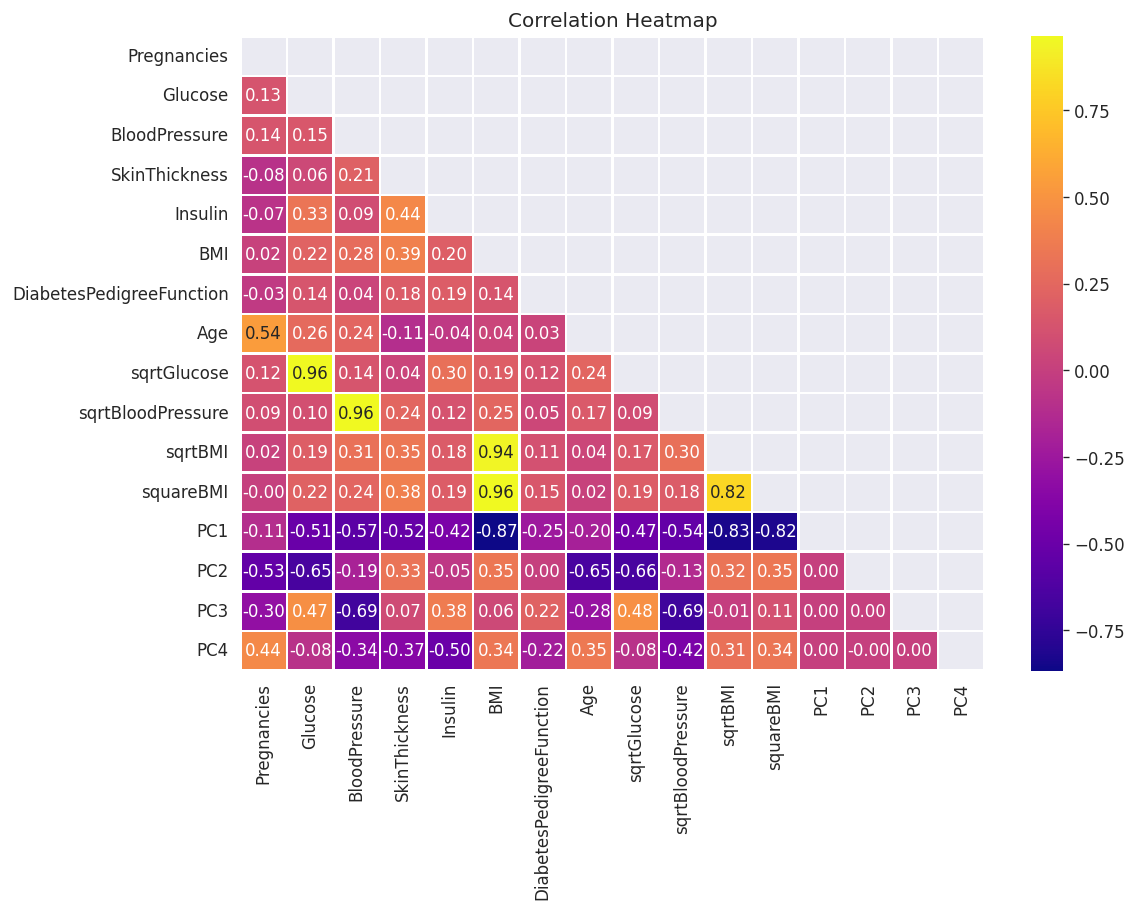

In [31]:
plt.figure(dpi = 120,figsize= (10,7))
mask = np.triu(np.ones_like(dfnormpca.corr(),dtype = bool))
sns.heatmap(dfnormpca.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

# Regressão logística infos normais



In [32]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [36]:
features = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI",
            "DiabetesPedigreeFunction","Age"]

In [37]:
M_logit_normal = sm.GLM(df["Outcome"],  df[features], family = sm.families.Binomial(), ).fit()
print(M_logit_normal.summary2())

                   Results: Generalized linear model
Model:                 GLM                 AIC:               950.6528  
Link Function:         logit               BIC:               -4114.6274
Dependent Variable:    Outcome             Log-Likelihood:    -467.33   
Date:                  2022-12-06 00:10    LL-Null:           -496.74   
No. Observations:      768                 Deviance:          934.65    
Df Model:              7                   Pearson chi2:      793.      
Df Residuals:          760                 Scale:             1.0000    
Method:                IRLS                                             
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1284   0.0286  4.4843 0.0000  0.0723  0.1845
Glucose                   0.0129   0.0027  4.7568 0.0000  0.0076  0.018

# Regressão logística com PCA 

In [38]:
features = ["PC1","PC2","PC3","PC4"]

In [39]:
M_logit_pca  = sm.GLM(dfpadpca["Outcome"],  dfpadpca[features], family = sm.families.Binomial(), ).fit()
print(M_logit_pca.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            761.8711  
Link Function:      logit            BIC:            -4321.9843
Dependent Variable: Outcome          Log-Likelihood: -376.94   
Date:               2022-12-06 00:11 LL-Null:        -496.74   
No. Observations:   768              Deviance:       753.87    
Df Model:           3                Pearson chi2:   1.01e+03  
Df Residuals:       764              Scale:          1.0000    
Method:             IRLS                                       
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
PC1     -8.0191     0.8264   -9.7036   0.0000   -9.6388   -6.3994
PC2     -4.7809     0.6517   -7.3356   0.0000   -6.0583   -3.5035
PC3      5.2023     0.6428    8.0927   0.0000    3.9423    6.4622
PC4      6.0067     0.7762    7.7384   0.00